# Network Science Assignment 2 - Group 10

Submitted by Venkatesh Ramesh, Julia Kaltenborn and Yiran Wang

Deadline: Monday, 4th of October, 2021

In [1]:
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from cdlib import algorithms, NodeClustering
from collections import OrderedDict

In [2]:
#DATA_DIR = '/Users/Venky/Documents/Fall2021/Network Science/NS_assignment_2/'
DATA_DIR = '/home/julia/Documents/Master/Courses/NetworkScience/networks/'

# mail dataset
EMAIL_DIR = DATA_DIR + 'email-Enron/'
EMAIL_FILE = os.path.join(EMAIL_DIR, 'email-Enron.txt')
NAME_FILE = os.path.join(EMAIL_DIR, 'addresses-email-Enron.txt') 

# real-classic datasets
STRIKE_DIR = DATA_DIR + 'real-classic/strike.gml'
KARATE_DIR = DATA_DIR + 'real-classic/karate.gml'
POLBLOGS_DIR = DATA_DIR + 'real-classic/polblogs.gml'
POLBOOKS_DIR = DATA_DIR + 'real-classic/polbooks.gml'
FOOTBALL_DIR = DATA_DIR + 'real-classic/football.gml'

# real-node datasets
#CITESEER_DIR = DATA_DIR +
#CORA_DIR = DATA_DIR +
#PUBMED_DIR = DATA_DIR +

# get the lfr directly from networkx (done in the init method)
LFR_Graph = "LFR"

In [ ]:
# add multigraph description in football and polblogs dataset
first_time = False

if first_time:
    with open(POLBLOGS_DIR, "r") as f:
        contents = f.readlines()

    contents.insert(3, "  multigraph 1\n")

    with open(DATA_DIR + 'real-classic/polblogs.gml', "w") as f:
        contents = "".join(contents)
        f.write(contents)

    # repeat for football dataset
    with open(FOOTBALL_DIR, "r") as f:
        contents = f.readlines()

    contents.insert(3, "  multigraph 1\n")

    with open(DATA_DIR + 'real-classic/football.gml', "w") as f:
        contents = "".join(contents)
        f.write(contents)


## Task 1

#### Task:

Select 3 (or more) centrality measures and find the top 5 most important nodes in the Enron dataset.
Who are the top ranked people?

#### Choosen Centrality measures:

- Degree Dentrality
  (the more connections you have, the more important you are)
- Eigenvector Centrality
  (you are also important if you have few, but important connections -> node importance is proportional to importance of neighbours)
- Katz Centrality
  (every node gets also a basic importance)

#### Top 5 most important nodes on Enron:

Nodes are sorted descending according to importance (1st node most important, etc).

**Degree Centrality**:

    The node is: 64 kenneth.lay@enron.com and eigenvector centrality is:  0.09698241084395674
    The node is: 8 sally.beck@enron.com and eigenvector centrality is:  0.09450809531493733
    The node is: 20 jeff.dasovich@enron.com and eigenvector centrality is:  0.08713893819590124
    The node is: 118 jeff.skilling@enron.com and eigenvector centrality is:  0.08159862298961863
    The node is: 55 tana.jones@enron.com and eigenvector centrality is:  0.07406809746651605


**Eigenvector Centrality**:

    The node is: 116 richard.shapiro@enron.com and eigenvector centrality is:  0.38457070348367267
    The node is: 20 jeff.dasovich@enron.com and eigenvector centrality is:  0.3398566958738682
    The node is: 125 james.steffes@enron.com and eigenvector centrality is:  0.31728537101568177
    The node is: 277 susan.mara@enron.com and eigenvector centrality is:  0.2697413866317303
    The node is: 301 paul.kaufman@enron.com and eigenvector centrality is:  0.2531443747601147

**Katz Centrality**:

    The node is: 21329 jmenconi@adv-eng-ser-inc.com and eigenvector centrality is:  0.40822913964034824
    The node is: 10329 portland.shift@enron.com and eigenvector centrality is:  0.3256678476119233
    The node is: 6025 shift.dl-portland@enron.com and eigenvector centrality is:  0.1703861023050983
    The node is: 3540 jons@amerexenergy.com and eigenvector centrality is:  0.1610306098569608
    The node is: 3543 s.schnitzer@worldnet.att.net and eigenvector centrality is:  0.12526807290978584


In [3]:
class Graph:
    
    def __init__(self, path, names_path):
        '''Loading the dataset and storing it as a weighted directed networkx graph.
        Parameters:
            path (str): Path to dataset with '.txt' extension that stores pairs of nodes
        '''
        
        self.data = np.loadtxt(path).tolist() 
        self.weighted_edges = []
        print('Loaded Data')
        
        self.get_edgecount()
        
        self.DG = nx.DiGraph()
        self.DG.add_weighted_edges_from(self.weighted_edges)
        print('Initialized networkx graph.')
        
        self.names_path = names_path
        self.name_list = self.format_names(self.names_path)
        print('Loaded the name dictionary')
        
    def get_edgecount(self):
        ''' 
        Get the corresponding edgecount for graph to make a weighted graph.
        
        '''
        conn_dict = dict()
        for conn in self.data:
            idx = (conn[0], conn[1])

            if idx in conn_dict.keys():
                val = conn_dict[idx]
                conn_dict[idx] = val+1
            else:
                conn_dict[idx] = 1
        
        for k in conn_dict:
            self.weighted_edges.append(list([k[0], k[1], conn_dict[k]]))
        print('Got the edge weights of the graph')
    
    def format_names(self, names_path):
        '''
        '''
        names = []
        with open(names_path) as file:
            lines = file.readlines()
            lines = [line.rstrip() for line in lines]
            for l in lines:
                names.append(l.replace('\t', ' '))
        return names
        
    def get_top_five(self, data):
        '''
        Get the dict for top 5 nodes for each type of centrality
        Sauce: https://stackoverflow.com/questions/38218501/python-get-top-n-keys-with-value-as-dictionary
        
        '''
        top5 = dict(sorted(data.items(), key=lambda x: x[1], reverse=True)[:5])
        return OrderedDict(top5)
    
    def degree_centrality(self):
        '''
        Calculate the in_degree and out_degree centrality measure for the graph and find the top 5 nodes.
        
        The correct way seems to be to calculate the in and out degree separately for each graph for 
        directed graphs. I'm not sure how to rank top 5 nodes in that case.  
        
        '''
        
        dc = nx.algorithms.degree_centrality(self.DG)
        top = self.get_top_five(dc)
        for item in top:
             print('The node is:', self.name_list[int(item)-1], 'and eigenvector centrality is: ', top[item])
    
    def eigenvector_centrality(self):
        '''
        Calculate the eigenvector centrality measure for the graph and find the top 5 nodes.
        
        In directed graph, Ax = kx for calculating importance based on incoming connection.
        xA = kx for outgoing connnections.
        
        '''
        
        dc = nx.algorithms.eigenvector_centrality(self.DG, weight='weight')
        top = self.get_top_five(dc)
        for item in top:
            print('The node is:', self.name_list[int(item)-1], 'and eigenvector centrality is: ', top[item])
            
    def katz_centrality(self):
        '''
        Calculate the katz centrality measure for the graph and find the top 5 nodes.
        
        Raises 'PowerIterationFailedConvergence' with default 1000 iterations so set to 2000.
        '''
        
        dc = nx.algorithms.katz_centrality_numpy(self.DG, weight='weight')
        top = self.get_top_five(dc)
        for item in top:
             print('The node is:', self.name_list[int(item)-1], 'and eigenvector centrality is: ', top[item])

In [4]:
enron = Graph(EMAIL_FILE, NAME_FILE)

Loaded Data
Got the edge weights of the graph
Initialized networkx graph.
Loaded the name dictionary


In [5]:
enron.degree_centrality()

The node is: 64 kenneth.lay@enron.com and eigenvector centrality is:  0.09698241084395674
The node is: 8 sally.beck@enron.com and eigenvector centrality is:  0.09450809531493733
The node is: 20 jeff.dasovich@enron.com and eigenvector centrality is:  0.08713893819590124
The node is: 118 jeff.skilling@enron.com and eigenvector centrality is:  0.08159862298961863
The node is: 55 tana.jones@enron.com and eigenvector centrality is:  0.07406809746651605


In [6]:
enron.eigenvector_centrality()

The node is: 116 richard.shapiro@enron.com and eigenvector centrality is:  0.38457070348367267
The node is: 20 jeff.dasovich@enron.com and eigenvector centrality is:  0.3398566958738682
The node is: 125 james.steffes@enron.com and eigenvector centrality is:  0.31728537101568177
The node is: 277 susan.mara@enron.com and eigenvector centrality is:  0.2697413866317303
The node is: 301 paul.kaufman@enron.com and eigenvector centrality is:  0.2531443747601147


In [7]:
enron.katz_centrality()

The node is: 21329 jmenconi@adv-eng-ser-inc.com and eigenvector centrality is:  0.40822913964034613
The node is: 10329 portland.shift@enron.com and eigenvector centrality is:  0.3256678476119323
The node is: 6025 shift.dl-portland@enron.com and eigenvector centrality is:  0.170386102305107
The node is: 3540 jons@amerexenergy.com and eigenvector centrality is:  0.16103060985695303
The node is: 3543 s.schnitzer@worldnet.att.net and eigenvector centrality is:  0.12526807290977976


## Task 2

Select 2 (or more) community detection or graph clustering algorithms which cluster a given graph,
and compare their performance.

**Selected community detection / graph clustering algorithms**:
- Infomap
- Lovain
- Label Propagation
- Walktrap
- Eigenvector

### 2. A) Applying The Algorithms

#### 1) Real-classic

**- Strike**

**- Karate**

**- Polblog**

**- Polbooks**

**- Football**

#### 2) Real-node-label

**- Citeseer**

**- Cora**

**- Pubmed**

#### 3) Synthetic

**- LFR**

### 2. B) Performance Comparison

**Method to determine performance:**

- How much do the results agree with known clusters using NMI (Normalized Mutual Information)?
- How much do the results agree with known clusters using ARI (Adjusted Rand Index)?
- What is the Q-modularity?

**Average performances on:**

#### 1) Real-classic

#### 2) Real-node-label

#### 3) Synthetic

#### 4) Overall average

In [8]:
# TODO convert to unweighted graph as well!
# TODO do I need to change something for multigraphs?
class GraphClustering:
    
    def __init__(self, path):
        '''Loading the desired graph.
        Parameters:
            path (str): Path to dataset with '.gml' extension that stores nodes and edges, or 'LFR' for synthetic dataset
        '''
        if path == 'LFR': 
            self.graph = nx.generators.community.LFR_benchmark_graph
        elif path.split('.')[-1] == 'gml':
            self.graph = nx.read_gml(path)
            
        # convert nodes to integers
        if not isinstance(list(self.graph.nodes.data())[0][0], int):
            self.graph = nx.relabel.convert_node_labels_to_integers(self.graph, first_label=1)
            
        # list of clusters sorted according to nodes ids
        self.pred_clusters = None
        # convert clusters to integers
        if not isinstance(list(self.graph.nodes.data())[0][1]['value'], int):
            clusters = list(set([node[1]['value'] for node in self.graph.nodes.data()]))
            self.true_clusters = [clusters.index(node[1]['value']) for node in self.graph.nodes.data()]
        else:
            self.true_clusters = [node[1]['value']-1 for node in self.graph.nodes.data()]
        
        # create community list necessary for community init
        com_list = [[] for cluster_set in set(self.true_clusters)]
        for node, cluster in enumerate(self.true_clusters):
            com_list[cluster].append(node + 1)
        # community objects
        self.pred_communities = None
        self.true_communities = NodeClustering(communities=com_list, graph=self.graph, method_name="ground_truth")
        
        # store position of graph and name of the currently used clustering algorithm
        self.alg = ""
        self.graph_pos = nx.spring_layout(self.graph, seed = 42)
        
        print('Loaded Graph')
        
    def draw_clusters(self, which='true', dataset_name=''):
        '''
        Parameters:
            which (str): 'true' or 'pred'
            dataset_name (str): Name of dataset printed in title
        '''
        # get all the values of the graph
        #colors = [node[1]['value'] for node in self.graph.nodes.data()]
        if which == 'true':
            nx.draw(self.graph, node_color=self.true_clusters, cmap='tab10', pos=self.graph_pos)
            plt.title('True Graph Clustering of Dataset {}'.format(dataset_name))
        elif which == 'pred':
            nx.draw(self.graph, node_color=self.pred_clusters, cmap='tab10', pos=self.graph_pos)
            plt.title('Predicted Graph Clustering of Dataset {} with {}'.format(dataset_name, self.alg))
        else:
            print("You must either choose 'true' or 'pred'")
            
        plt.show()
        
    def communities_to_list(self, communities):
        '''
        '''
        node_cluster_dict = {int(node): cluster[0] for node, cluster in communities.to_node_community_map().items()}
        ordered_node_cluster_list = list(OrderedDict(sorted(node_cluster_dict.items())).values())
        return ordered_node_cluster_list
        
        
    def infomap_clustering(self):
        ''' infomap clustering
        '''
        self.alg = 'infomap'
        self.pred_communities = algorithms.infomap(self.graph)
        self.pred_clusters = self.communities_to_list(self.pred_communities)
        
    def lovain_clustering(self):
        ''' lovain clustering
        '''
        self.alg = 'lovain'
        # convert graph to undirected for lovain clustering
        clean_graph = self.graph
        if self.graph.is_directed():
            clean_graph = clean_graph.to_undirected()
            
        self.pred_communities = algorithms.louvain(clean_graph)
        self.pred_clusters = self.communities_to_list(self.pred_communities)
        
    def label_propagation_clustering(self):
        ''' label propagation clustering
        '''
        self.alg = 'label_propagation'
        # convert graph to undirected for label propagation
        clean_graph = self.graph
        if self.graph.is_directed():
            clean_graph = clean_graph.to_undirected()
        
        self.pred_communities = algorithms.label_propagation(clean_graph)
        self.pred_clusters = self.communities_to_list(self.pred_communities)
    
    def eigenvector_clustering(self):
        ''' eigenvector clustering
        '''
        self.alg = 'eigenvector'
        # convert graph to undirected for eigenvector clustering
        clean_graph = self.graph
        if self.graph.is_directed():
            clean_graph = clean_graph.to_undirected()
            
        self.pred_communities = algorithms.eigenvector(clean_graph)
        self.pred_clusters = self.communities_to_list(self.pred_communities)
    
    def walktrap_clustering(self):
        ''' walktrap clustering
        '''
        self.alg = 'walktrap'
        # convert graph to undirected for walktrap clustering
        clean_graph = self.graph
        if self.graph.is_directed():
            clean_graph = clean_graph.to_undirected()
            
        self.pred_communities = algorithms.walktrap(clean_graph)
        self.pred_clusters = self.communities_to_list(self.pred_communities)
        
    def calc_modularity(self):
        ''' Returns Q modularity
        '''
        return self.pred_communities.newman_girvan_modularity().score
    
    def ari(self):
        ''' Returns adjusted rand index score
        '''
        return self.true_communities.adjusted_rand_index(self.pred_communities).score
    
    def nmi(self):
        ''' Return normalized mutual information score
        '''
        return self.true_communities.normalized_mutual_information(self.pred_communities).score
    
    def compare_algs(self, show_graph=False, clustering_algs=['walktrap_clustering'], dataset_name=''):
        ''' Comparing the different algorithms on the current graph
        
        Parameters:
            show_graph (bool): if the graphs with colored clusters should be printed
            clustering_algs (list): list with clustering algorithms that should be applied
            dataset_name (str): name of the dataset on which the algs are run
        
        Returns:
            dict <3-tuple>: A dictionary with the algs as keys and the results as values. 
                Each value is n-tuple, where the 1st entry is modularity, the 2nd ari and the 3rd nmi
        '''
        results = {}

        for func in clustering_algs:
            getattr(self, func)()
            results[str(func)] = (self.calc_modularity(), self.ari(), self.nmi())
            if show_graph:
                strike.draw_clusters(dataset_name=dataset_name, which='pred')
                
        return results

In [9]:
clustering_algs = ['infomap_clustering', 
                   'lovain_clustering', 
                   'label_propagation_clustering',
                   'eigenvector_clustering',
                   'walktrap_clustering']

real_classic_data = {'Strike': STRIKE_DIR, 
                     'Karate': KARATE_DIR, 
                     'Polblogs': POLBLOGS_DIR, 
                     'Polbooks': POLBOOKS_DIR, 
                     'Football': FOOTBALL_DIR}

In [10]:
# # Example
# strike = GraphClustering(STRIKE_DIR)
# strike.draw_clusters(dataset_name="Strike", which='true')
# strike.walktrap_clustering()
# strike.draw_clusters(dataset_name="Strike", which='pred')
# print("Q Modularity:", strike.calc_modularity())
# print("ARI", strike.ari())
# print("NMI", strike.nmi())

# strike.label_propagation_clustering()
# strike.draw_clusters(dataset_name="Strike", which='pred')
# print("Q Modularity:", strike.calc_modularity())
# print("ARI", strike.ari())
# print("NMI", strike.nmi())

## Real-Classic Dataset

Loaded Graph


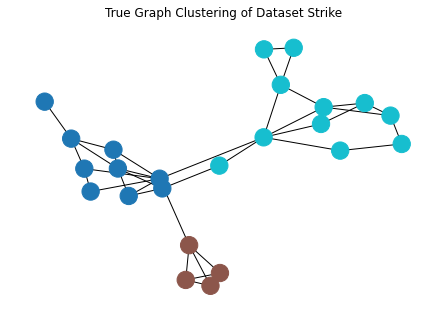

Loaded Graph


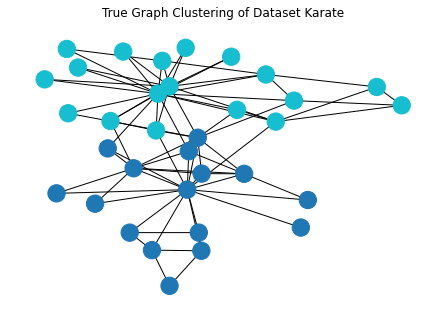

Loaded Graph
Loaded Graph


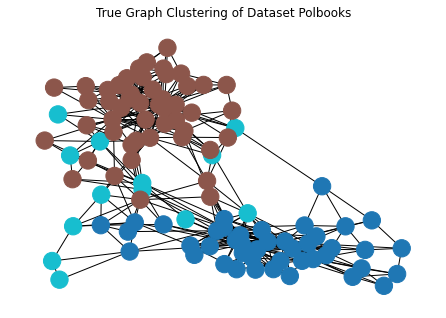

Loaded Graph


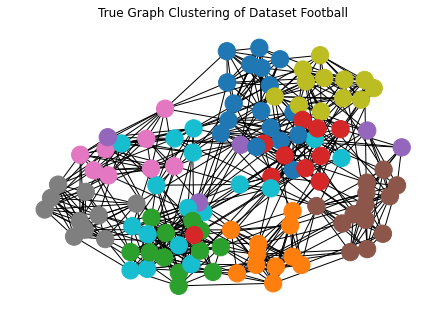

[{'infomap_clustering': (0.5619806094182825, 0.79778985286037, 0.8840698882757508), 'lovain_clustering': (0.5557479224376731, 0.6646619281939129, 0.7704087582586155), 'label_propagation_clustering': (0.4740304709141273, 0.38546656770798193, 0.650927132858692), 'eigenvector_clustering': (0.5619806094182825, 0.79778985286037, 0.8840698882757508), 'walktrap_clustering': (0.5619806094182825, 0.79778985286037, 0.8840698882757508)}, {'infomap_clustering': (0.4020381328073636, 0.7021550152558961, 0.6994881609814816), 'lovain_clustering': (0.3952169625246549, 0.4396976667762077, 0.5818578653600565), 'label_propagation_clustering': (0.35470085470085466, 0.7530573577539186, 0.7209631986289142), 'eigenvector_clustering': (0.3934089414858646, 0.5120890589667768, 0.6770918449243223), 'walktrap_clustering': (0.35322156476002636, 0.33312659896115976, 0.5041780325367384)}, {'infomap_clustering': (-0.014457320936557851, 0.39324105975877366, 0.31997677353639487), 'lovain_clustering': (0.4221904999309314

In [11]:
results_real_classic = []

for name, dataset in real_classic_data.items():

    cluster_graph = GraphClustering(dataset)
    if name != 'Polblogs':
        cluster_graph.draw_clusters(dataset_name=name, which='true')
    
    results_here = cluster_graph.compare_algs(clustering_algs=clustering_algs, dataset_name=name)

    results_real_classic.append(results_here)

print(results_real_classic)

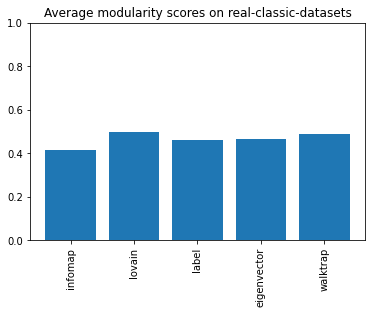

Highest modularity value of 0.5004275546466461 was achieved by ['lovain']


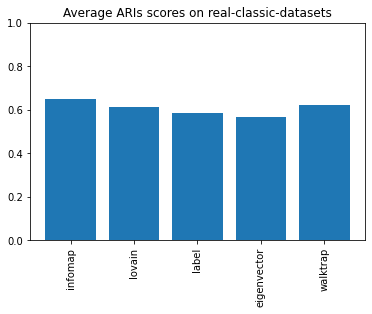

Highest ARI score of 0.6491581917884439 was achieved by ['infomap']


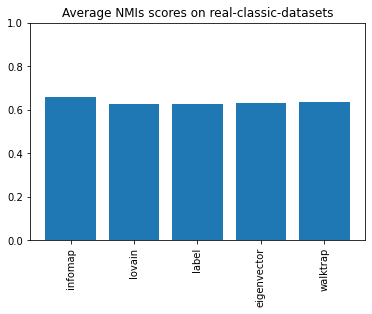

Highest NMI score of 0.657856952339407 was achieved by ['infomap']


In [13]:
# show results_real_classic
modularities = {alg: [] for alg in clustering_algs}
aris = {alg: [] for alg in clustering_algs}
nmis = {alg: [] for alg in clustering_algs}

for dataset in results_real_classic:
    for alg, results in dataset.items():
        modularities[alg].append(results[0])
        aris[alg].append(results[1])
        nmis[alg].append(results[2])

# calculate average
modularities = {alg.split('_')[0]: sum(results)/len(results) for alg, results in modularities.items()}
aris = {alg.split('_')[0]: sum(results)/len(results) for alg, results in aris.items()}
nmis = {alg.split('_')[0]: sum(results)/len(results) for alg, results in nmis.items()}

# plot modularities
plt.bar(*zip(*modularities.items()))
plt.xticks(rotation='vertical')
plt.ylim(0, 1)
plt.title('Average modularity scores on real-classic-datasets')
plt.show()
max_modularity = max(modularities.values())
best_algs = [alg for alg, result in modularities.items() if result == max_modularity]
print("Highest modularity value of {} was achieved by {}".format(max_modularity, best_algs))

# plot aris
plt.bar(*zip(*aris.items()))
plt.xticks(rotation='vertical')
plt.ylim(0, 1)
plt.title('Average ARIs scores on real-classic-datasets')
plt.show()
max_ari = max(aris.values())
best_algs = [alg for alg, result in aris.items() if result == max_ari]
print("Highest ARI score of {} was achieved by {}".format(max_ari, best_algs))

# plot nmis
plt.bar(*zip(*nmis.items()))
plt.xticks(rotation='vertical')
plt.ylim(0, 1)
plt.title('Average NMIs scores on real-classic-datasets')
plt.show()
max_nmi = max(nmis.values())
best_algs = [alg for alg, result in nmis.items() if result == max_nmi]
print("Highest NMI score of {} was achieved by {}".format(max_nmi, best_algs))

## Real-Node-Label

## Synthetic

## Overall